<a href="https://colab.research.google.com/github/viniciuswv/ANP-Petroleum-Statistical-Exploration/blob/main/EDA_ANP_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação do Pandas para trabalhar com o dataframe:
import pandas as pd
# Importação do Numpy para trabalhar com o arrays:
import numpy as np
# Importação do Matplotlib:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Instalando o Pandas Profiling (para o relatório generalizado do dataframe):
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=4e84d9a9b1e2377cb257f25c6f9f53c7c2f0107090bf621d4a4cec3b084bee15
  Stored in directory: /tmp/pip-ephem-wheel-cache-0giv8wy_/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
# Importação do dataset:
path = '/content/drive/My Drive/Colab Notebooks/ANP Dataset/'
path = path + "Base de dados ANP.xlsx"

# Como está em .xlsx, utilizar:
df  = pd.read_excel(path)

In [ ]:
# Verificação do dataframe:
df.head()

,Ano,Mês,Corrente,Bacia,Grau_API,%S,NAT,Nitrogênio,Fração_leve,Fração_média,Fração_pesada,Reais
0,2020,Janeiro,Alagoano,Alagoas,40.8,0.039,0.10,0.039,0.2522,0.3008,0.4470,1625.3252
1,2020,Janeiro,Albacora,Campos,26.2,0.462,0.28,0.320,0.1605,0.2588,0.5807,1384.8592
2,2020,Janeiro,Albacora Leste,Campos,19.0,0.599,2.52,0.450,0.0855,0.2165,0.6980,1267.6320
3,2020,Janeiro,Araçari,Potiguar,34.3,0.078,0.86,0.480,0.2155,0.3005,0.4840,1592.6238
4,2020,Janeiro,Atlanta,Santos,13.2,0.345,10.70,0.460,0.0162,0.1468,0.8370,1295.2574


In [ ]:
# Atribuindo a coluna 'Corrente' como index (índice) do dataframe:
dfnew = df.set_index('Corrente')

# Determinando o nome das correntes:
corrente = ['Alagoano', 'Albacora', 'Albacora Leste', 'Araçari', 'Arribaçã',
            'Atapu', 'Atlanta', 'Baiano Mistura', 'Baiano Mistura',
            'Baiano Mistura', 'Barracuda-Caratinga', 'Baúna', 'Berbigão-Sururu',
            'Bijupirá', 'Búzios', 'Cabiúnas Mistura', 'Canário', 'Cardeal',
            'Cardeal do Nordeste', 'Ceará Mar', 'Colibri', 'Concriz',
            'Condensado de Merluza', 'Condensado de Mexilhão', 'Espadarte',
            'Espírito Santo', 'Farfan', 'Fazenda Alegre', 'Fazenda Belém',
            'Fazenda Santo Estevão', 'Frade', 'Gaivota', 'Galo de Campina',
            'Gavião Azul', 'Gavião Branco', 'Gavião Caboclo', 'Gavião Real',
            'Gavião Vermelho', 'Golfinho', 'Iraúna', 'Irerê', 'Itapu',
            'Joao de Barro', 'Lagoa do Paulo Norte', 'Lapa', 'Tupi',
            'Marlim', 'Marlim Leste', 'Marlim Sul', 'Mero', 'Ostra',
            'Papa-Terra', 'Parque das Baleias', 'Peregrino', 'Peroá', 'Pescada',
            'Piranema', 'Polo Enchova', 'Polo Pampo', 'Polo Pargo', 'Polvo',
            'Rabo Branco', 'RGN Mistura', 'Rolinha', 'Roncador',
            'Sabiá Bico de Osso', 'Sabiá da Mata', 'Salema', 'Sapinhoá',
            'Sépia', 'Sergipano Mar', 'Sergipano Terra', 'Sul de Tupi',
            'Sul de Sapinhoá', 'Tabuleiro', 'Tambaú-Uruguá', 'Tartaruga Verde',
            'Tico-Tico', 'Tigre', 'Trovoada', 'Tubarão Martelo', 'Uirapuru',
            'Upanema', 'Urucu']

# Criando listas vazias para armazenar os valores do processo iterativo:
APImeans = []
Smeans = []
NATmeans = []
Nmeans = []
Rmeans = []

for i in corrente:
  dfFilter = dfnew.loc[[i]] # Filtra a corrente requerida.
  
  dfFeatureAPI = dfFilter['Grau_API'] # Filtra a feature requerida.
  medianAPI = dfFeatureAPI.median() # Calcula a média da feature requerida.
  APImeans.append(medianAPI) # Atualiza a lista de média do grau API.
  
  dfFeatureS = dfFilter['%S'] # Filtra a feature requerida.
  medianS = dfFeatureS.median() # Calcula a média da feature requerida.
  Smeans.append(medianS) # Atualiza a lista de média do enxofre.
  
  dfFeatureNAT = dfFilter['NAT'] # Filtra a feature requerida.
  medianNAT = dfFeatureNAT.median() # Calcula a média da feature requerida.
  NATmeans.append(medianNAT) # Atualiza a lista de média do NAT.
  
  dfFeatureN = dfFilter['Nitrogênio'] # Filtra a feature requerida.
  medianN = dfFeatureN.median() # Calcula a média da feature requerida.
  Nmeans.append(medianN) # Atualiza a lista de média do nitrogênio.
  
  dfFeatureReais = dfFilter['Reais'] # Filtra a feature requerida.
  medianReais = dfFeatureReais.median() # Calcula a média da feature requerida.
  Rmeans.append(medianReais) # Atualiza a lista de média de R$/m³.
  

# Transformando as listas em vetores:
APImeans = np.asarray(APImeans)
Smeans = np.asarray(Smeans)
NATmeans = np.asarray(NATmeans)
Nmeans = np.asarray(Nmeans)
Rmeans = np.asarray(Rmeans)

# Empilhando os vetores em colunas, lado a lado:
dfMedian = np.column_stack((APImeans, Smeans, NATmeans, Nmeans, Rmeans))

# Transformando o array em dataframe e recriando o nome das colunas:
dfMedian = pd.DataFrame(dfMedian, columns= ['Grau_API', '%S', 'NAT', 'Nitrogênio', 'R$/m³'])

dfMedian

,Grau_API,%S,NAT,Nitrogênio,R$/m³
0,40.8,0.039,0.10,0.039,1520.67890
1,26.2,0.462,0.28,0.320,1315.80565
2,19.0,0.599,2.52,0.450,1245.67315
3,34.3,0.078,0.86,0.480,1477.72815
4,38.5,0.038,0.01,0.043,1291.79180
...,...,...,...,...,...
79,33.2,0.079,NaN,NaN,1432.07685
80,21.2,1.050,0.30,0.500,1250.29670
81,37.4,0.050,0.09,0.470,1481.98725
82,31.0,0.053,0.16,0.152,1270.29150


In [ ]:
# Separando cada atributo em uma variável:
reais = dfMedian['R$/m³']

api = dfMedian['Grau_API']

s = dfMedian['%S']

tan = dfMedian['NAT']

n = dfMedian['Nitrogênio']

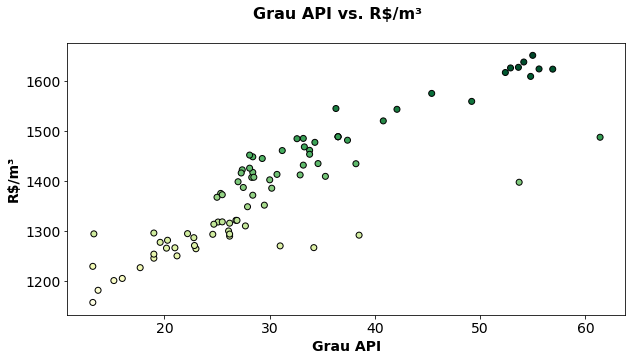

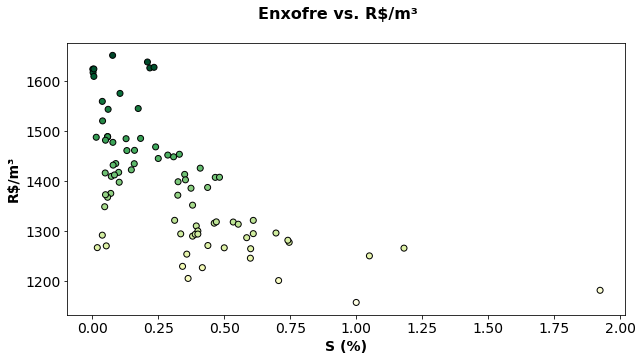

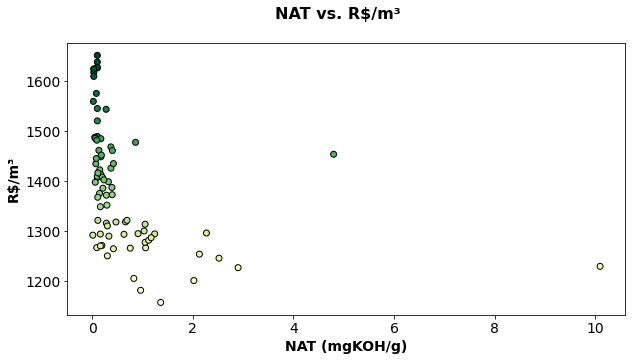

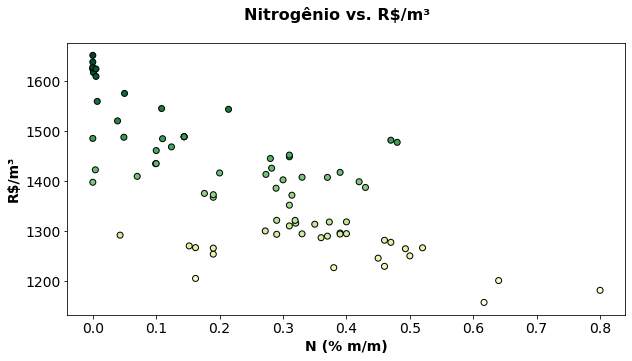

In [ ]:
# Plotando os gráficos para as correlações bivariadas:

# API vs R$/m³:
plt.rcParams["figure.figsize"] = (10,5)
fig = plt.figure()
fig.suptitle('Grau API vs. R$/m³', fontsize=16, fontweight='bold')
plt.scatter(api, reais, c = reais, cmap = 'YlGn', edgecolors = 'black')
plt.xlabel('Grau API', fontsize=14, fontweight='bold')
plt.ylabel('R$/m³', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ANP Dataset/APIvsReais.png', transparent=True, dpi=1200)

# Enxofre vs R$/m³:
plt.rcParams["figure.figsize"] = (10,5)
fig = plt.figure()
fig.suptitle('Enxofre vs. R$/m³', fontsize=16, fontweight='bold')
plt.scatter(s, reais, c = reais, cmap = 'YlGn', edgecolors = 'black')
plt.xlabel('S (%)', fontsize=14, fontweight='bold')
plt.ylabel('R$/m³', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ANP Dataset/EnxofrevsReais.png', transparent=True, dpi=1200)

# TAN vs R$/m³:
plt.rcParams["figure.figsize"] = (10,5)
fig = plt.figure()
fig.suptitle('NAT vs. R$/m³', fontsize=16, fontweight='bold')
plt.scatter(tan, reais, c = reais, cmap = 'YlGn', edgecolors = 'black')
plt.xlabel('NAT (mgKOH/g)', fontsize=14, fontweight='bold')
plt.ylabel('R$/m³', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ANP Dataset/NATvsReais.png', transparent=True, dpi=1200)

# Nitrogênio vs R$/m³:
plt.rcParams["figure.figsize"] = (10,5)
fig = plt.figure()
fig.suptitle('Nitrogênio vs. R$/m³', fontsize=16, fontweight='bold')
plt.scatter(n, reais, c = reais, cmap = 'YlGn', edgecolors = 'black')
plt.xlabel('N (% m/m)', fontsize=14, fontweight='bold')
plt.ylabel('R$/m³', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/content/drive/MyDrive/ANP Dataset/NitrogeniovsReais.png', transparent=True, dpi=1200)

In [ ]:
# Inicializando a ferramenta de data science:
profile = ProfileReport(dfMedian, title='ANP dataset', html={'style':{'full_width': True}})
profile.to_notebook_iframe()